In [1]:
import google.colab
google.colab.drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import sys
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout, Activation, Embedding
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from keras.callbacks  import ModelCheckpoint, LearningRateScheduler, EarlyStopping

In [15]:
os.listdir('drive/MyDrive/M2/advanced ia/2- LSTM')

['data.csv', 'LSTM.keras', 'LSTM20.ipynb', 'LSTM.ipynb']

In [16]:
os.chdir('drive/MyDrive/M2/advanced ia/2- LSTM')

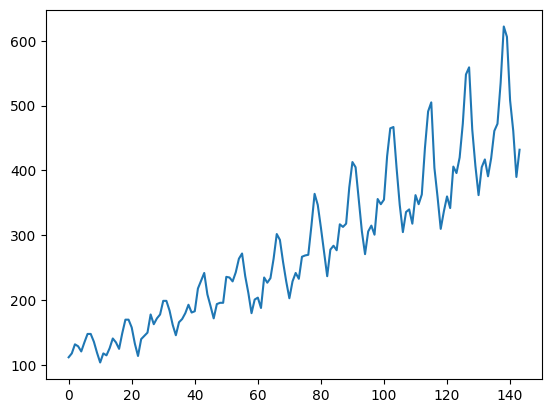

In [17]:
data=pd.read_csv('data.csv',delimiter=';',usecols=[1],engine='python')
import pandas as pd
import matplotlib.pyplot as plt

# # Assuming 'data' is your DataFrame with columns 'Month' and 'Passengers'
# # Replace 'Month' and 'Passengers' with the actual column names if they are different
# plt.plot(data['Month'], data['Passengers'])  # Specify x and y data for the plot
# plt.xlabel('Month')  # Label the x-axis
# plt.ylabel('Passengers')  # Label the y-axis
# plt.title('Passenger Data')  # Add a title
# plt.show()  # Display the plot

plt.plot(data)
plt.show()

In [18]:
from sklearn.preprocessing import MinMaxScaler # Importing the MinMaxScaler class


scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(data) # Correcting the typo in the method name: fit_transform

In [19]:
np.shape(dataset)

(144, 1)

In [20]:
data_revelled = dataset.reshape(dataset.shape[0],)
np.shape(data_revelled)


(144,)

In [21]:
data_ravelled = dataset.ravel()


In [22]:
import numpy as np
array = np.random.random((10,))
print(array)
print((array.strides[-1], ))
print(array.strides )
print(array.strides + (array.strides[-1],))

[0.0841709  0.74839521 0.91039087 0.27480326 0.14416293 0.73927808
 0.38887245 0.60174306 0.46496436 0.59083498]
(8,)
(8,)
(8, 8)


In [23]:
array.strides

(8,)

In [24]:
a = np.array(['s', 's'])
a.strides[-1]

4

In [25]:
def sliding_window(a, window):
  shape = a.shape[: -1] + (a.shape[-1] - window + 1, window)
  strides = a.strides + (a.strides[-1], )
  return np.lib.stride_tricks.as_strided(a, shape=shape, strides = strides)
#taille_vectuer - taille_window + pas = 144 -3  + 1 = 142

In [26]:
size = 3
win_data = sliding_window(data_ravelled, size)
np.shape(win_data)

(142, 3)

In [27]:
# split into train and test sets

train_size = int(len(win_data) * 0.7)
test_size = len(win_data) - train_size
train, test = win_data[0: train_size], win_data[train_size: len(win_data), :]
test, validation = test[0: int(test_size/ 2), :], test[int(test_size/2) : len(test), :]

print(len(train), len(test), len(validation))

99 21 22


In [28]:
train[1:2]

array([[0.02702703, 0.05405405, 0.04826255]])

In [29]:
train[1, 0 ]

0.02702702702702703

In [30]:
# convert an array of valeus into a dataset matrix ( to convert x-> t  Y -> t+1)

def create_dataset(dataset, look_back = 1):
  dataX, dataY = [] , []
  for i in range(len(dataset) - look_back - 1):
    a = dataset[i: (i + look_back), 0]
    dataX.append(a)
    dataY.append(dataset[i + look_back, 0])
  return np.array(dataX), np.array(dataY)


In [48]:
# reshape into X = t and Y = t + 1
look_back = 3
X_train, y_train = create_dataset(train, look_back)
X_test, y_test = create_dataset(test, look_back)
X_validation, y_validation = create_dataset( validation, look_back)

In [49]:
np.shape(X_train), np.shape(y_train)

((95, 3), (95,))

activer le pour look_back = 3

In [50]:
# x_train = np.reshape(X_train, (X_train.shape[0], look_back, X_train.shape[1]))
# x_test = np.reshape(X_test, (X_test.shape[0], look_back, X_test.shape[1]))
# x_validation = np.reshape(X_validation, (X_validation.shape[0], look_back, X_validation.shape[1]))


In [51]:
x_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
x_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))
x_validation = np.reshape(X_validation, (X_validation.shape[0], 1, X_validation.shape[1]))

In [52]:
np.shape(X_train), np.shape(y_train)

((95, 3), (95,))

In [53]:
y_train = y_train.reshape(y_train.shape[0], 1)
y_test = y_test.reshape(y_test.shape[0], 1)
y_validation = y_validation.reshape(y_validation.shape[0], 1)

In [54]:
np.shape(y_validation), np.shape(x_validation)

((18, 1), (18, 1, 3))

In [55]:
x_train

array([[[0.01544402, 0.02702703, 0.05405405]],

       [[0.02702703, 0.05405405, 0.04826255]],

       [[0.05405405, 0.04826255, 0.03281853]],

       [[0.04826255, 0.03281853, 0.05984556]],

       [[0.03281853, 0.05984556, 0.08494208]],

       [[0.05984556, 0.08494208, 0.08494208]],

       [[0.08494208, 0.08494208, 0.06177606]],

       [[0.08494208, 0.06177606, 0.02895753]],

       [[0.06177606, 0.02895753, 0.        ]],

       [[0.02895753, 0.        , 0.02702703]],

       [[0.        , 0.02702703, 0.02123552]],

       [[0.02702703, 0.02123552, 0.04247104]],

       [[0.02123552, 0.04247104, 0.07142857]],

       [[0.04247104, 0.07142857, 0.05984556]],

       [[0.07142857, 0.05984556, 0.04054054]],

       [[0.05984556, 0.04054054, 0.08687259]],

       [[0.04054054, 0.08687259, 0.12741313]],

       [[0.08687259, 0.12741313, 0.12741313]],

       [[0.12741313, 0.12741313, 0.1042471 ]],

       [[0.12741313, 0.1042471 , 0.05598456]],

       [[0.1042471 , 0.05598456, 0.01930

In [73]:
num_epochs = 500
batch_size = 32
sequence_length = x_train.shape[1]
input_dim = x_train.shape[2]
output_dim = 1

# model = Sequential()

# model.add(LSTM(64, return_sequences = True, input_shape = (sequence_length, input_dim)))
# model.add(Dropout(0.4))

# model.add(LSTM(128, return_sequences = False))
# model.add(Dropout(0.4))

# # model.add(LSTM(128, return_sequences = False))
# # model.add(Dropout(0.2))

# model.add(Dense(output_dim))
# model.add(Activation('linear'))

# checkpointer = ModelCheckpoint(filepath='LSTM.keras', monitor='val_loss', verbose=0, save_best_only=True,
#                                save_weights_only=False, mode='min')
# early = EarlyStopping(monitor='val_loss', min_delta=0, patience=30, verbose=0, mode='auto')
# model.compile(loss='mse', optimizer='adam', metrics=['mse', 'mean_absolute_percentage_error'])

from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout, Activation, Bidirectional, BatchNormalization, GaussianNoise
from keras.regularizers import l2
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

model = Sequential()

# Input Layer with Gaussian Noise
# model.add(GaussianNoise(0.1, input_shape=(sequence_length, input_dim)))

# Bidirectional LSTM
model.add(Bidirectional(LSTM(64, return_sequences=True, kernel_regularizer=l2(0.01))))
model.add(Dropout(0.3))
model.add(BatchNormalization())

# Second LSTM Layer
model.add(LSTM(128, return_sequences=False, kernel_regularizer=l2(0.01)))
model.add(Dropout(0.4))

# Output Layer
model.add(Dense(output_dim))
model.add(Activation('linear'))

# Compile the Model
optimizer = Adam(learning_rate=0.0001)
model.compile(loss='mse', optimizer=optimizer, metrics=['mse', 'mean_absolute_percentage_error'])

# Callbacks
checkpointer = ModelCheckpoint(filepath='LSTM.keras', monitor='val_loss', save_best_only=True, mode='min')
early = EarlyStopping(monitor='val_loss', patience=8, mode='min')
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=10, min_lr=1e-6, verbose=1)

# Model Summary
model.summary()


Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ bidirectional_6 (Bidirectional)      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_14 (Dropout)                 │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_6                │ ?                           │     0 (unbuilt) │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_15 (LSTM)                       │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_15 (Dropout)                 │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_7 (Activation)            │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [74]:
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=num_epochs, validation_data=(x_validation, y_validation), callbacks= [checkpointer, early])

Epoch 1/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 8s 334ms/step - loss: 2.2380 - mean_absolute_percentage_error: 620995.7500 - mse: 0.0679 - val_loss: 2.6709 - val_mean_absolute_percentage_error: 99.4491 - val_mse: 0.5154
Epoch 2/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 2.2168 - mean_absolute_percentage_error: 285536.0000 - mse: 0.0651 - val_loss: 2.6480 - val_mean_absolute_percentage_error: 98.9696 - val_mse: 0.5107
Epoch 3/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 2.1969 - mean_absolute_percentage_error: 273252.7188 - mse: 0.0634 - val_loss: 2.6252 - val_mean_absolute_percentage_error: 98.5089 - val_mse: 0.5063
Epoch 4/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 2.1783 - mean_absolute_percentage_error: 25204.8066 - mse: 0.0631 - val_loss: 2.6027 - val_mean_absolute_percentage_error: 98.0573 - val_mse: 0.5019
Epoch 5/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 2.1576 - mean_absolute_percentage_error: 853269.6250 - mse: 0.0606 - val_loss: 2.5803 - val_mean_absolute_perc

In [75]:
test_metrics = model.evaluate(x_test, y_test, verbose=0)


print("Loss ", test_metrics[0])
print("Mean Squared Error ", test_metrics[1])
print("MAPE :", test_metrics[2])



Loss  0.0349239856004715
Mean Squared Error  0.014456316828727722
MAPE : 17.51026153564453


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 389ms/step


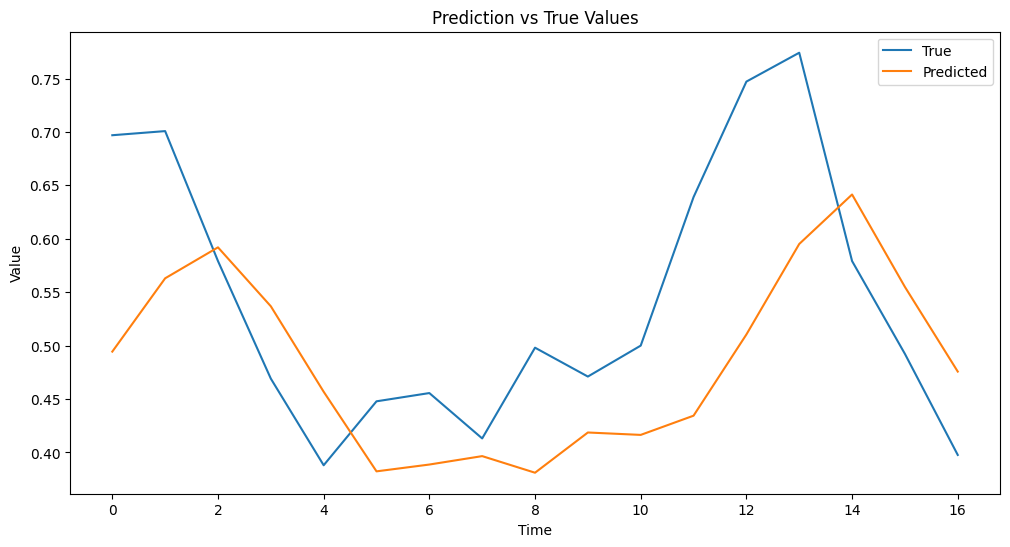

In [76]:
# Optionally, predict and plot the results
predictions = model.predict(x_test)
plt.figure(figsize=(12, 6))
plt.plot(y_test, label='True')
plt.plot(predictions, label='Predicted')
plt.title('Prediction vs True Values')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()